# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9381 Щеглов Дмитрий, вариант 18.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Задача Коши.

Задача Коши подразумевает собой поиск частного решения уравнения $y = \phi(x)$ из числа общих, удовлетворяющим некоторым условиям. Общий вид задачи Коши:

$\begin{cases}
f(x,y,y',...,y^{(n)})\\
y(x_0)=y_0\\
y'(x_0)=y_1\\
.\\
.\\
.\\
y^{(n-1)}(x_0)=y_{n-1}
\end{cases}$



## Постановка задачи

Дано дифференциальное уравнение:

$y'' = f(x, y), a < x < b$ (1)

и граничные условия

$y(a) = y_a, y(b) = y_b.$ (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a)=y_a$ $y'(a) = h.$ (3)

План решения основан на многократном решении задачи Коши (1), (3).
Значение решения задачи Коши при $x=b$ является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b,h)=y_b$ (4)

Это уравнение с одним неизвестным h.

Для его решения можно применить стандартный метод половинного деления.

## Выполнение работы

Вариант 18.

$f(x,y)=ln(2*x+1)*sin(y)$

$y_0 = 0, \quad y_2 = 3$

$a = 0, \quad b = 2$

Пусть $h_0 = 0$

In [55]:
import numpy as np
import matplotlib.pyplot
import math
import typing


def Func(x: float, y: float):
    return math.log(2*x+1)*math.sin(y)


class SecondOrder:
    def __init__(self, a: float, b: float, y_a: float, f: typing.Callable):
        self._a = a
        self._b = b
        self._y_a = y_a
        self._f = f

    def Decision(self, h: float, step: float) -> typing.Tuple[list, list]:
        x = self._a
        y = self._y_a
        g = h

        gPoints = []
        yPoints = []

        while x < self._b:
            gPoints.append(g)
            yPoints.append(y)
            k1 = self._f(x, y)
            k2 = self._f(x + step / 2, y + step / 2 * k1)
            k3 = self._f(x + step / 2, y + step / 2 * k2)
            k4 = self._f(x + step, y + step * k3)
            y += g * step
            g += step / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
            x += step

        return gPoints, yPoints


class HalfMethod:
    def __init__(self, ode: SecondOrder, h: float, dt: float, epsilon: float):
        self._ode = ode
        self._h = h
        self._dt = dt
        self._epsilon = epsilon

    def Decision(self, tvalue: float):
        step = 0.01
        h = self._h
        dt = self._dt
        _, yPoints = self._ode.Decision(h, step)
        y = yPoints[-1]
        print("h\t\t\ty(b,h)\t\t\tDelta")
        while abs(y - tvalue) > self._epsilon:
            print("{:4f}\t\t {:4f}\t\t {:4f}".format(h, y, dt))
            left = h - dt
            right = h + dt
            _, yPoints = self._ode.Decision(left, step)
            leftY = yPoints[-1]
            _, yPoints = self._ode.Decision(right, step)
            rightY = yPoints[-1]

            if (leftY - tvalue) * (y - tvalue) < 0:
                h = left + dt * 0.5
            elif (rightY - tvalue) * (y - tvalue) < 0:
                h = right - dt * 0.5
            else:
                raise ValueError("No decision")

            dt *= 0.5
            _, yPoints = self._ode.Decision(h, step)
            y = yPoints[-1]

        print("{:4f}\t\t {:4f}\t\t {:4f}".format(h, y, dt))
        return h

print("Выполнение половинного метода:")
instance = SecondOrder(a=0.000000001, b=2, y_a=0, f=Func)
bm = HalfMethod(ode=instance, h=1, dt=10, epsilon=0.001)
result = bm.Decision(tvalue=3)

Выполнение половинного метода:
h			y(b,h)			Delta
1.000000		 3.039961		 10.000000
-4.000000		 -7.957241		 5.000000
-1.500000		 -3.982057		 2.500000
-0.250000		 -0.896285		 1.250000
0.375000		 1.321179		 0.625000
0.687500		 2.269237		 0.312500
0.843750		 2.675800		 0.156250
0.921875		 2.862903		 0.078125
0.960938		 2.952648		 0.039062
0.980469		 2.996603		 0.019531
0.990234		 3.018356		 0.009766
0.985352		 3.007498		 0.004883
0.982910		 3.002055		 0.002441
0.981689		 2.999330		 0.001221


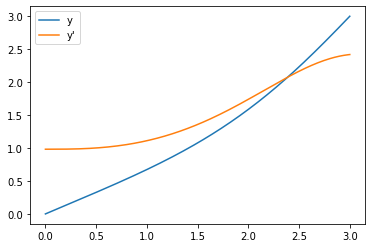

In [50]:
gPoints, yPoints = instance.Decision(result, 1 / 100)
xPoints = np.linspace(0, 3, 200)
matplotlib.pyplot.plot(xPoints, yPoints, label="y")
matplotlib.pyplot.plot(xPoints, gPoints, label="y'")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

## Выводы.

В ходе выполнения практической работы была решена краевая задача для уравнения второго порядка путем многократного решения задачи Коши.